<a href="https://colab.research.google.com/github/Forutanrad/LearnPytorch/blob/main/LearnPyTorch_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Of PyTorch

**Javad ForutanRad** <br>
Email: ForutanRad@gmail.com <br>
linkedin: https://www.linkedin.com/in/forutanrad/

**Import Need packages**

In [2]:
import torch
from torch import nn # Neural Network in PyTorch

import numpy as np
import matplotlib.pyplot as plt

**Select Device (Gpu or Cpu)**

In [3]:
device = torch.device('cuda:0') # 0 when has multi Gpu then select one of these. if has one Gpu only Type 'cuda'
print(device)

cuda:0


**Test Gpu**

In [4]:
torch.cuda.get_device_properties('cuda:0')

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)

In [5]:
d = torch.tensor([2,3,4,5,6,7], device= device)
print(d)
print(d.shape)

tensor([2, 3, 4, 5, 6, 7], device='cuda:0')
torch.Size([6])


In [6]:
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)  # Line y=1+2x+n

idx = np.arange(100)
np.random.shuffle(idx)

**Split Data For Train and Validiation**

In [7]:
train_idx = idx[:80]
val_idx   = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


**Plot Data**

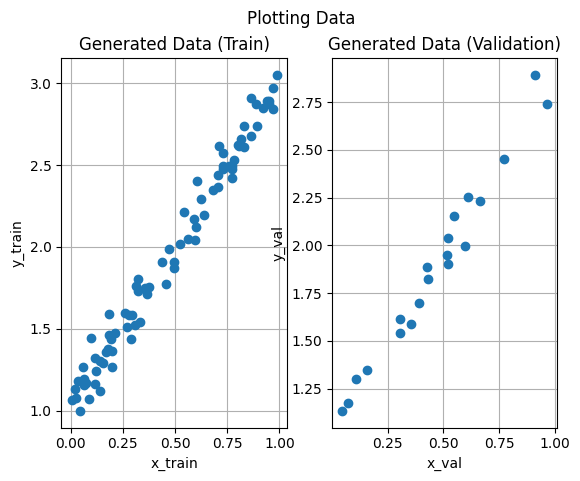

In [8]:
plt.subplot(121)
plt.plot(x_train, y_train, 'o')
plt.title('Generated Data (Train)')
plt.grid()
plt.xlabel('x_train')
plt.ylabel('y_train')

plt.subplot(122)
plt.plot(x_val, y_val, 'o')
plt.title('Generated Data (Validation)')
plt.grid()
plt.xlabel('x_val')
plt.ylabel('y_val')

plt.suptitle("Plotting Data")
plt.show()

In [ ]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)
print(a, b)

#Compute our model predict data
y = a + b + x_train

print(y.shape)

[0.49671415] [-0.1382643]
(80, 1)


In [ ]:
# How Calc Loss in out our model? thats is the error
error = (y_train - y)

# it is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

1.3569629098883744


In [ ]:
# compute gradients for buth "a" and "b" parameters
a_grad = -2 * error.mean()
b_grad = -2 * (x_train * error).mean()

print('a_grad:', a_grad)
print('b_grad:', b_grad)

a_grad: -2.2457736739540097
b_grad: -1.2427626612977714


In [ ]:
lr = 1e-1

#update parameters using gradiants and the lerning rate
a = a - lr * a_grad
b = b - lr * b_grad
print('a:', a)
print('b:', b)


a: [0.94586889]
b: [0.11028823]


In [ ]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(f'a is {a} and b is {b}')

lr = 1e-1

n_epochs = 1000

for epoch in range(n_epochs):
    yhat = a + b * x_train

    error = (y_train - yhat)

    loss = (error ** 2).mean()

    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    a = a - lr * a_grad
    b = b - lr * b_grad

print(f'New value in epoch {epoch} for a is: {a} and for b is: {b}')


a is [0.49671415] and b is [-0.1382643]
New value in epoch 999 for a is: [1.02354094] and for b is: [1.96896411]


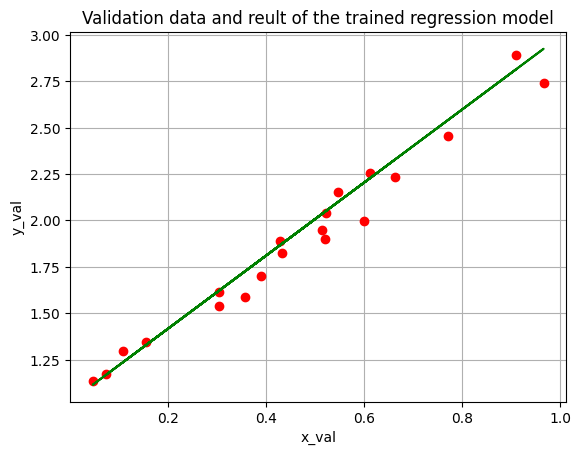

In [ ]:
plt.plot(x_val, y_val, 'ro')
plt.title('Validation data and reult of the trained regression model')
plt.grid()
plt.xlabel('x_val')
plt.ylabel('y_val')
# Final regression model
yhat = a + b * x_val
plt.plot(x_val, yhat, 'g')

In [ ]:
a = torch.randint(10, (2, 3), device=device)
print('a: ', a)
print('a: ', a.dtype)
print(50*'-')
b = a.float()
print('b: ', b)
print('b: ', b.dtype)

a:  tensor([[1, 7, 7],
        [1, 1, 6]], device='cuda:0')
a:  torch.int64
--------------------------------------------------
b:  tensor([[1., 7., 7.],
        [1., 1., 6.]], device='cuda:0')
b:  torch.float32


In [ ]:
np_array = np.random.randint(0, 10, (2, 3))
print(np_array)

print(50*'-')

tensor = torch.from_numpy(np_array)
print(tensor)

[[7 4 6]
 [9 2 6]]
--------------------------------------------------
tensor([[7, 4, 6],
        [9, 2, 6]])


**Tensor toooo Array**

In [ ]:
np_array = tensor.numpy()

print(np_array)

[[7 4 6]
 [9 2 6]]


In [ ]:
a = torch.randint(10, (2, 3), device=torch.device('cuda'))
print(a)
print(50*'-')
# Method 1
b = a.to('cpu').numpy()
print(b)
print(50*'-')
# Method 2
c = a.cpu().numpy()
print(c)

tensor([[0, 1, 1],
        [4, 8, 0]], device='cuda:0')
--------------------------------------------------
[[0 1 1]
 [4 8 0]]
--------------------------------------------------
[[0 1 1]
 [4 8 0]]


In [ ]:
# Converts numpy arrays to tensor
x_train = torch.from_numpy(x_train)
x_train = x_train.to('cuda')

y_train = torch.from_numpy(y_train)
y_train = y_train.to('cuda')

# Initializes parameters "a" and "b" randomly
torch.manual_seed(42)
a = torch.randn(1, device=device)
b = torch.randn(1, device=device)
print('Initial value of a: ', a)
print('Initial value of b: ', b)
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train

    # How wrong is our model? That's the error!
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

print('Final value of a: ', a)
print('Final value of b: ', b)

Initial value of a:  tensor([0.1940], device='cuda:0')
Initial value of b:  tensor([0.1391], device='cuda:0')
Final value of a:  tensor([1.0235], device='cuda:0')
Final value of b:  tensor([1.9690], device='cuda:0')


**Derivation in PyTorch**

In [ ]:
x = torch.randn(1, requires_grad=True)
print('X:', x)
y = x ** 3 + 3.14 ** x + 5/10

print('y:', y)

y.backward(x) ##  backward only for x dy/dx

X: tensor([0.3367], requires_grad=True)
y: tensor([2.0081], grad_fn=<AddBackward0>)


**Optimization in PyTorch**

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(a , b)
optimizer = torch.optim.SGD([a, b], lr=0.01)
print(optimizer)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
optimizer.step()
print(a , b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [ ]:
train_idx = idx[:80]
val_idx   = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
# Converts numpy arrays to tensor
x_train = torch.from_numpy(x_train)
x_train = x_train.to('cuda')

y_train = torch.from_numpy(y_train)
y_train = y_train.to('cuda')

# Initializes parameters "a" and "b" randomly
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)
print('Initial value of a: ', a)
print('Initial value of b: ', b)

#Define optimizer
optimizer = torch.optim.SGD([a, b], lr = lr)


# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train

    # How wrong is our model? That's the error!
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Computes gradients for both "a" and "b" parameters
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_train * error).mean()
    loss.backward()

    # Updates parameters using gradients and the learning rate
    # a = a - lr * a_grad
    # b = b - lr * b_grad
    optimizer.step()

    #resets gradiants
    optimizer.zero_grad()

print('Final value of a: ', a)
print('Final value of b: ', b)

Initial value of a:  tensor([0.1940], device='cuda:0', requires_grad=True)
Initial value of b:  tensor([0.1391], device='cuda:0', requires_grad=True)
Final value of a:  tensor([1.0235], device='cuda:0', requires_grad=True)
Final value of b:  tensor([1.9690], device='cuda:0', requires_grad=True)


**Loss Function in PyTorch**

In [ ]:
loss = torch.nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

output = loss(input , target)

print(output)

tensor(1.0192, grad_fn=<MseLossBackward0>)


In [ ]:
# # Converts numpy arrays to tensor
# x_train = torch.from_numpy(x_train)
# x_train = x_train.to('cuda')

# y_train = torch.from_numpy(y_train)
# y_train = y_train.to('cuda')

# Initializes parameters "a" and "b" randomly
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)
print('Initial value of a: ', a)
print('Initial value of b: ', b)

#Define optimizer
optimizer = torch.optim.SGD([a, b], lr = lr)

#Define loss
loss_fn = torch.nn.MSELoss()

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train

    # How wrong is our model? That's the error!
    # error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train)

    # Computes gradients for both "a" and "b" parameters
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_train * error).mean()
    loss.backward()

    # Updates parameters using gradients and the learning rate
    # a = a - lr * a_grad
    # b = b - lr * b_grad
    optimizer.step()

    #resets gradiants
    optimizer.zero_grad()

print('Final value of a: ', a)
print('Final value of b: ', b)

Initial value of a:  tensor([0.1940], device='cuda:0', requires_grad=True)
Initial value of b:  tensor([0.1391], device='cuda:0', requires_grad=True)
Final value of a:  tensor([1.0235], device='cuda:0', requires_grad=True)
Final value of b:  tensor([1.9690], device='cuda:0', requires_grad=True)


***************************
#**Define Model in PyTorch**

##**First Method**

nn.Sequential

In [10]:
model = torch.nn.Sequential(
    nn.Linear(10, 30),
    nn.Sigmoid(),
    nn.Linear(30, 1),
    nn.Softmax()
)
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=1, bias=True)
  (3): Softmax(dim=None)
)


In [11]:
l_model = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)
print(l_model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


In [12]:
train_idx = idx[:80]
val_idx   = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [13]:
# Converts numpy arrays to tensor
x_train = torch.from_numpy(x_train).float()
x_train = x_train.to('cuda')

y_train = torch.from_numpy(y_train).float()
y_train = y_train.to('cuda')

# Initializes parameters "a" and "b" randomly
# torch.manual_seed(42)
# a = torch.randn(1, requires_grad=True, device=device)
# b = torch.randn(1, requires_grad=True, device=device)
# print('Initial value of a: ', a)
# print('Initial value of b: ', b)

#Define model
l_model = torch.nn.Sequential(
    torch.nn.Linear(1, 1).to('cuda:0')
    )

l_model.train()

# Sets learning rate
lr = 1e-1

#Define optimizer
optimizer = torch.optim.SGD(l_model.parameters(), lr = lr)


#Define loss
loss_fn = torch.nn.MSELoss()

# Defines number of epochs
n_epochs = 1000
for epoch in range(n_epochs):
    # Computes our model's predicted output
    # yhat = a + b * x_train
    yhat = l_model(x_train)

    # How wrong is our model? That's the error!
    # error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train)

    # Computes gradients for both "a" and "b" parameters
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_train * error).mean()
    loss.backward()

    # Updates parameters using gradients and the learning rate
    # a = a - lr * a_grad
    # b = b - lr * b_grad
    optimizer.step()

    #resets gradiants
    optimizer.zero_grad()

# print('Final value of a: ', a)
# print('Final value of b: ', b)
print(l_model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])


****************
##**Second Method**

nn.Module

In [ ]:
class ABC(nn.Module):
    def __init__(self, param1, param2, param3):
        # execute super class's __init__()
        super().__init__()
        # Instanciate nn.Module class and assign as a member

    def forward(self, x):
        # write the sequence of layers and processes

        return x

In [15]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, n_input, n_unit1, n_output):
        super().__init__()
        self.hidden  = torch.nn.Linear(n_input, n_unit1)
        self.sigmoid = torch.nn.Sigmoid()
        self.output  = torch.nn.Linear(n_unit1, n_output)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

nn_model = NeuralNetwork(10, 30, 2)
print(nn_model)

NeuralNetwork(
  (hidden): Linear(in_features=10, out_features=30, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=30, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


In [16]:
x = torch.randn(20, 10)
y = nn_model(x)
print(y.shape)

torch.Size([20, 2])


In [17]:
class LinRegMdel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.neuron = torch.nn.Linear(1, 1)

    def forward(self, x):
        y = self.neuron(x)
        return y
l_model2 =  LinRegMdel()
print(l_model2)

LinRegMdel(
  (neuron): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
t = torch.arange(5)


tensor([3, 1, 2, 0, 4])


In [18]:
np.random.seed(42)
x = np.random.rand(100, 1)

y = 1 + 2 * x + .1 * np.random.randn(100, 1)  # Line y=1+2x+n

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx   = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


x_train = torch.from_numpy(x_train).float()
x_train = x_train.to('cuda')

y_train = torch.from_numpy(y_train).float()
y_train = y_train.to('cuda')

In [24]:

#Define model
class LinRegMdel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.neroun1 = torch.nn.Linear(1, 1).to('cuda')
        # self.sigmuid = torch.nn.Sigmoid().to('cuda')
        # self.relu    = torch.nn.ReLU().to('cuda')
        # self.neroun2 = torch.nn.Linear(1,1).to('cuda')


    def forward(self, x):
        x = self.neroun1(x)
        # x = self.relu(x)
        # x = self.neroun2(x)

        return x
l_model2 = LinRegMdel()
l_model2.train()

# Sets learning rate
lr = 1e-1

#Define optimizer
optimizer = torch.optim.SGD(l_model2.parameters(), lr = lr)


#Define loss
loss_fn = torch.nn.MSELoss()

# Defines number of epochs
n_epochs = 200
for epoch in range(n_epochs):
    correct = 0
    # Computes our model's predicted output
    # yhat = a + b * x_train
    yhat = l_model2(x_train)

    # How wrong is our model? That's the error!
    # error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train)

    # Computes gradients for both "a" and "b" parameters
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_train * error).mean()
    loss.backward()

    # Updates parameters using gradients and the learning rate
    # a = a - lr * a_grad
    # b = b - lr * b_grad
    optimizer.step()

    #resets gradiants
    optimizer.zero_grad()


    # Print loss
    print(f'Epoch {epoch + 1}: Loss: {loss.item():.4f}')


# print('Final value of a: ', a)

# print('Final value of b: ', b)
print(l_model2.state_dict() , f'Loss:{loss.item():.4f}')


Epoch 1: Loss: 2.1803
Epoch 2: Loss: 1.3464
Epoch 3: Loss: 0.8718
Epoch 4: Loss: 0.6005
Epoch 5: Loss: 0.4440
Epoch 6: Loss: 0.3525
Epoch 7: Loss: 0.2979
Epoch 8: Loss: 0.2642
Epoch 9: Loss: 0.2424
Epoch 10: Loss: 0.2274
Epoch 11: Loss: 0.2163
Epoch 12: Loss: 0.2075
Epoch 13: Loss: 0.2001
Epoch 14: Loss: 0.1935
Epoch 15: Loss: 0.1875
Epoch 16: Loss: 0.1818
Epoch 17: Loss: 0.1765
Epoch 18: Loss: 0.1713
Epoch 19: Loss: 0.1664
Epoch 20: Loss: 0.1616
Epoch 21: Loss: 0.1570
Epoch 22: Loss: 0.1525
Epoch 23: Loss: 0.1482
Epoch 24: Loss: 0.1440
Epoch 25: Loss: 0.1399
Epoch 26: Loss: 0.1359
Epoch 27: Loss: 0.1321
Epoch 28: Loss: 0.1284
Epoch 29: Loss: 0.1248
Epoch 30: Loss: 0.1213
Epoch 31: Loss: 0.1179
Epoch 32: Loss: 0.1146
Epoch 33: Loss: 0.1114
Epoch 34: Loss: 0.1083
Epoch 35: Loss: 0.1053
Epoch 36: Loss: 0.1024
Epoch 37: Loss: 0.0995
Epoch 38: Loss: 0.0968
Epoch 39: Loss: 0.0941
Epoch 40: Loss: 0.0916
Epoch 41: Loss: 0.0891
Epoch 42: Loss: 0.0866
Epoch 43: Loss: 0.0843
Epoch 44: Loss: 0.08

(20, 1)


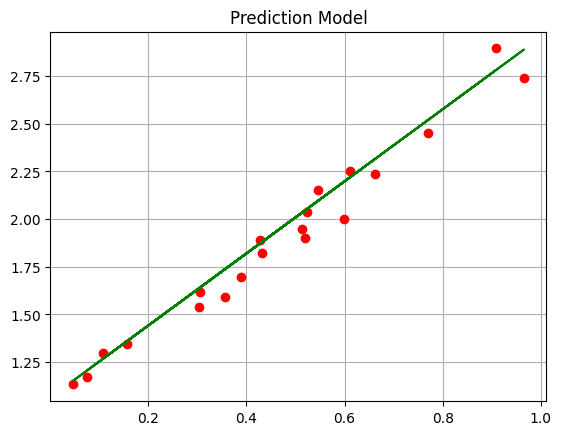

In [25]:
x_val_n = torch.from_numpy(x_val).float()
x_val_n = x_val_n.to('cuda')
y_val_n = torch.from_numpy(y_val).float()
y_val_n = y_val_n.to('cuda')


plt.plot(x_val, y_val, 'ro')
plt.title('Prediction Model')
plt.grid()

predict = l_model2(x_val_n)
yhat = predict.cpu().detach().numpy()
print(y_val.shape)
plt.plot(x_val, yhat, 'g')
